<a href="https://colab.research.google.com/github/AswiniSivadasan/DSA_Assignments/blob/main/Aswini_Preprocessing_Assmt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
#Loading dataset and setting index to PassengerId
data=pd.read_csv('/content/titanic_dataset.csv', index_col='PassengerId')
data

In [ ]:
# to find the header names of dataset
data.head()

In [ ]:
#To find the data type and details of dataset loaded
data.info()

In [ ]:
#to find the null values in the columns of a dataset
missing_values = data.isnull().sum()
# Display the count of missing values for each column
print("Missing values in each column:")
print(missing_values)

In [ ]:
# Fill missing values with the mean of each column
# mean of entire dataframe
mean_value = data.mean()
mean_imputation = data.fillna(mean_value)
mean_imputation.head()

In [44]:
#To check whether all the null values are removed or not .So once again checked the dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


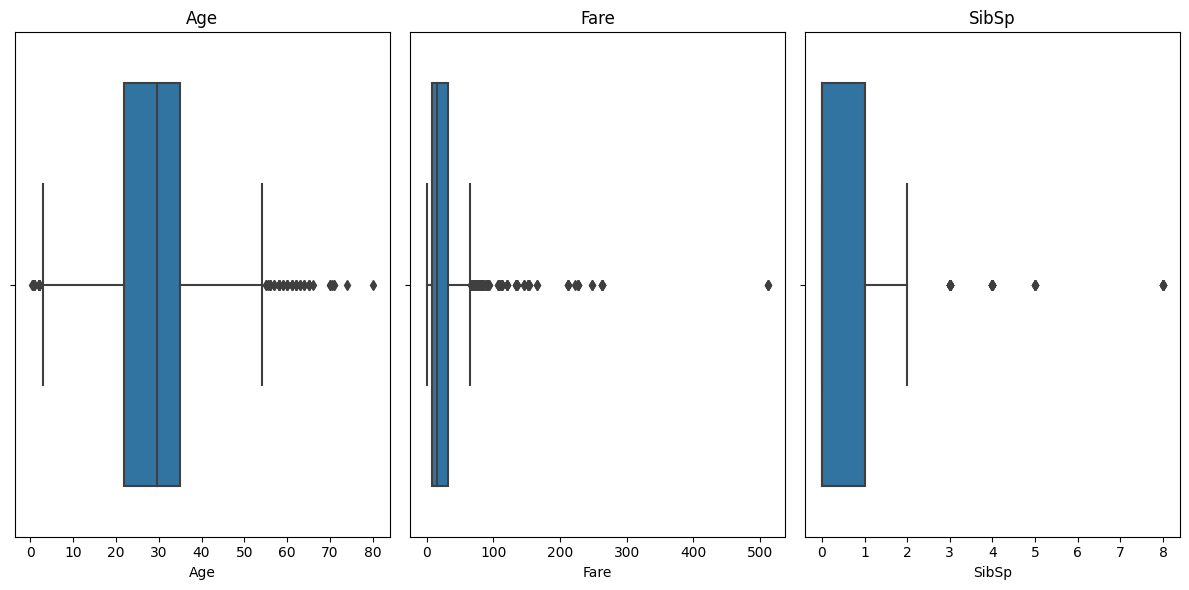

In [45]:
# Select the columns to analyze for outliers
columns_to_check = ['Age', 'Fare', 'SibSp']

# Plot boxplots for each selected column to visualize outliers
plt.figure(figsize=(12, 6))
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(1, len(columns_to_check), i)
    sns.boxplot(x=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()


In [46]:

# Handle outliers by capping the extreme values using the IQR method
for col in columns_to_check:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers
    data[col] = data[col].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))



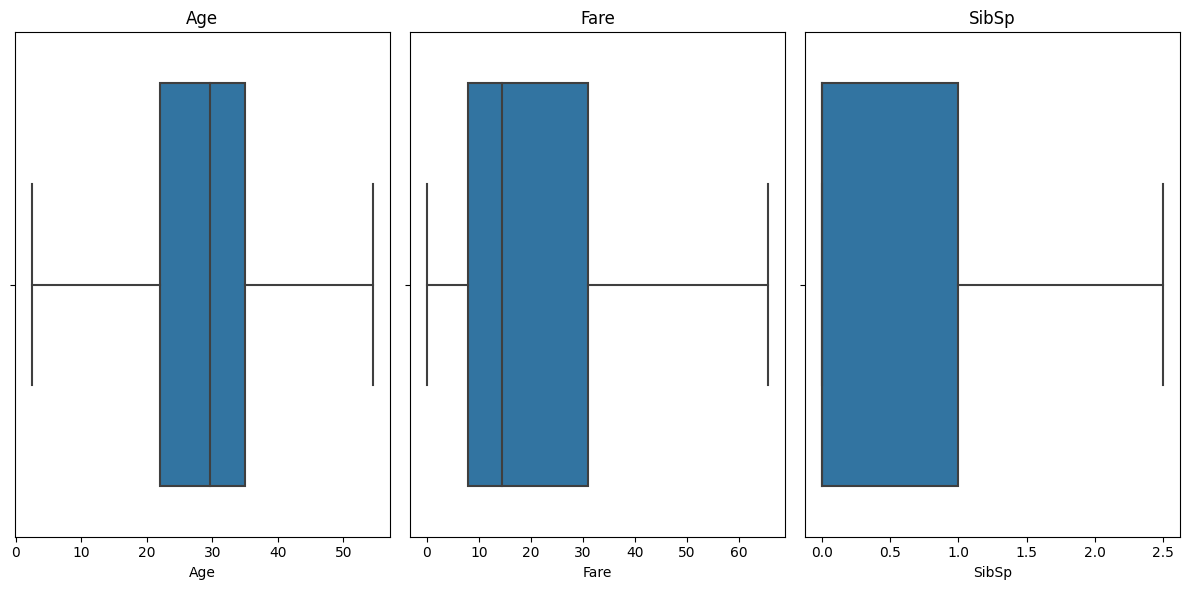

In [47]:
# Plot boxplots again to visualize the handled outliers
plt.figure(figsize=(12, 6))
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(1, len(columns_to_check), i)
    sns.boxplot(x=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [60]:
from sklearn.preprocessing import MinMaxScaler

In [61]:
# Separate features (excluding 'Survived') and the target variable
X = data.drop('Survived', axis=1)  # Features
y = data['Survived']  # Target

In [62]:
# Select only numeric columns for scaling
numeric_features = X.select_dtypes(include=['int64', 'float64'])

In [63]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()
# Fit and transform the feature set using Min-Max Scaling
scaled_features = scaler.fit_transform(numeric_features)

In [64]:
# Create a new DataFrame with the scaled features
scaled_df = pd.DataFrame(scaled_features, columns=numeric_features.columns, index=numeric_features.index)
# Display the head of the scaled DataFrame
scaled_df.head()

,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,
1,1.0,0.375000,0.4,0.0,0.110460
2,0.0,0.682692,0.4,0.0,1.000000
3,1.0,0.451923,0.0,0.0,0.120745
4,0.0,0.625000,0.4,0.0,0.809027
5,1.0,0.625000,0.0,0.0,0.122649
